# LB3

Необходимые библиотеки:

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

## Часть 1 Загрузка данных

2. Загрузка датасета в датафрейм.

In [106]:
all_data = pd.read_csv("data/dataset_group.csv", header=None)
all_data

0     1                  2
0      2000-01-01     1             yogurt
1      2000-01-01     1               pork
2      2000-01-01     1      sandwich bags
3      2000-01-01     1         lunch meat
4      2000-01-01     1       all- purpose
...           ...   ...                ...
22338  2002-02-26  1139               soda
22339  2002-02-26  1139  laundry detergent
22340  2002-02-26  1139         vegetables
22341  2002-02-26  1139            shampoo
22342  2002-02-26  1139         vegetables

[22343 rows x 3 columns]

In [107]:
unique_id = list(set(all_data[1]))
print(f"Количество покупателей: {len(unique_id)}")

Количество покупателей: 1139


In [108]:
items = list(set(all_data[2]))
print(f"Количество товаров: {len(items)}")

Количество товаров: 38


5. Объединение всех товаров покупателя в один список

In [109]:
dataset = [[elem for elem in all_data[all_data[1] == id][2]
            if elem in items] for id in unique_id]

## Часть 2 Подготовка данных

1. Необходимо представить данные в виде матрицы.

In [110]:
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

all- purpose  aluminum foil  bagels   beef  butter  cereals  cheeses  \
0          True           True   False   True    True    False    False   
1         False           True   False  False   False     True     True   
2         False          False    True  False   False     True     True   
3          True          False   False  False   False     True    False   
4          True          False   False  False   False    False    False   

   coffee/tea  dinner rolls  dishwashing liquid/detergent  ...  shampoo  \
0       False          True                         False  ...     True   
1       False         False                          True  ...     True   
2       False          True                         False  ...     True   
3       False         False                         False  ...    False   
4       False          True                         False  ...    False   

    soap   soda  spaghetti sauce  sugar  toilet paper  tortillas  vegetables  \
0   True   True            False  False         False      False        True   
1  False  False            False  False          True       True        True   
2   True   True             True  False          True      False        True   
3  False   True            False  False          True      False       False   
4  False   True             True  False          True       True        True   

   waffles  yogurt  
0    False    True  
1     True    True  
2    False   False  
3    False   False  
4     True    True  

[5 rows x 38 columns]

2. Данные теперь представляются в виде матрицы: строки - транзакции,
столбцы - наличие в транзакции элемента, ячейка - есть/нет в транзации

## Часть 3 APRIORI

После подготовки данных можно воспользоваться алгоритмом Априори

1. Запуск Априори с минимальным уровнем поддержки 0.3

In [111]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results

support                                    itemsets  length
0   0.374890                              (all- purpose)       1
1   0.384548                             (aluminum foil)       1
2   0.385426                                    (bagels)       1
3   0.374890                                      (beef)       1
4   0.367867                                    (butter)       1
5   0.395961                                   (cereals)       1
6   0.390694                                   (cheeses)       1
7   0.379280                                (coffee/tea)       1
8   0.388938                              (dinner rolls)       1
9   0.388060              (dishwashing liquid/detergent)       1
10  0.389816                                      (eggs)       1
11  0.352941                                     (flour)       1
12  0.370500                                    (fruits)       1
13  0.345917                                 (hand soap)       1
14  0.398595                                 (ice cream)       1
15  0.375768                          (individual meals)       1
16  0.376646                                     (juice)       1
17  0.371378                                   (ketchup)       1
18  0.378402                         (laundry detergent)       1
19  0.395083                                (lunch meat)       1
20  0.380158                                      (milk)       1
21  0.375768                                     (mixes)       1
22  0.362599                              (paper towels)       1
23  0.371378                                     (pasta)       1
24  0.355575                                      (pork)       1
25  0.421422                                   (poultry)       1
26  0.367867                             (sandwich bags)       1
27  0.349429                           (sandwich loaves)       1
28  0.368745                                   (shampoo)       1
29  0.379280                                      (soap)       1
30  0.390694                                      (soda)       1
31  0.373134                           (spaghetti sauce)       1
32  0.360843                                     (sugar)       1
33  0.378402                              (toilet paper)       1
34  0.369622                                 (tortillas)       1
35  0.739245                                (vegetables)       1
36  0.394205                                   (waffles)       1
37  0.384548                                    (yogurt)       1
38  0.310799                 (aluminum foil, vegetables)       2
39  0.300263                        (bagels, vegetables)       2
40  0.310799                       (cereals, vegetables)       2
41  0.309043                       (cheeses, vegetables)       2
42  0.308165                  (dinner rolls, vegetables)       2
43  0.306409  (dishwashing liquid/detergent, vegetables)       2
44  0.326602                          (eggs, vegetables)       2
45  0.302897                     (ice cream, vegetables)       2
46  0.309043             (laundry detergent, vegetables)       2
47  0.311677                    (lunch meat, vegetables)       2
48  0.331870                       (poultry, vegetables)       2
49  0.305531                          (soda, vegetables)       2
50  0.315189                       (waffles, vegetables)       2
51  0.319579                        (yogurt, vegetables)       2

Была получена таблица, в которой перечисленны все повторяющиеся элементы
с вероятностью больше 0.3. В последнем столбце показана длина повторяющегося
набора.

2. Применим Априори, но с ограничением на размер набора, равным 1

In [112]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results

support                        itemsets
0   0.374890                  (all- purpose)
1   0.384548                 (aluminum foil)
2   0.385426                        (bagels)
3   0.374890                          (beef)
4   0.367867                        (butter)
5   0.395961                       (cereals)
6   0.390694                       (cheeses)
7   0.379280                    (coffee/tea)
8   0.388938                  (dinner rolls)
9   0.388060  (dishwashing liquid/detergent)
10  0.389816                          (eggs)
11  0.352941                         (flour)
12  0.370500                        (fruits)
13  0.345917                     (hand soap)
14  0.398595                     (ice cream)
15  0.375768              (individual meals)
16  0.376646                         (juice)
17  0.371378                       (ketchup)
18  0.378402             (laundry detergent)
19  0.395083                    (lunch meat)
20  0.380158                          (milk)
21  0.375768                         (mixes)
22  0.362599                  (paper towels)
23  0.371378                         (pasta)
24  0.355575                          (pork)
25  0.421422                       (poultry)
26  0.367867                 (sandwich bags)
27  0.349429               (sandwich loaves)
28  0.368745                       (shampoo)
29  0.379280                          (soap)
30  0.390694                          (soda)
31  0.373134               (spaghetti sauce)
32  0.360843                         (sugar)
33  0.378402                  (toilet paper)
34  0.369622                     (tortillas)
35  0.739245                    (vegetables)
36  0.394205                       (waffles)
37  0.384548                        (yogurt)

3. Применим Априори и выведем только наборы с размером 2, а также
количество таких наборов

In [113]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ',len(results))

     support                                    itemsets  length
38  0.310799                 (aluminum foil, vegetables)       2
39  0.300263                        (bagels, vegetables)       2
40  0.310799                       (cereals, vegetables)       2
41  0.309043                       (cheeses, vegetables)       2
42  0.308165                  (dinner rolls, vegetables)       2
43  0.306409  (dishwashing liquid/detergent, vegetables)       2
44  0.326602                          (eggs, vegetables)       2
45  0.302897                     (ice cream, vegetables)       2
46  0.309043             (laundry detergent, vegetables)       2
47  0.311677                    (lunch meat, vegetables)       2
48  0.331870                       (poultry, vegetables)       2
49  0.305531                          (soda, vegetables)       2
50  0.315189                       (waffles, vegetables)       2
51  0.319579                        (yogurt, vegetables)       2

Count of result itemstes

4. Посчитаем количество наборов при различных уровнях поддержки.
Начальное значение поддержки 0.05, шаг 0.01.
5. Определите значение уровня поддержки при котором перестают
генерироваться наборы размера 1,2,3, и.т.д.

In [114]:
min_support = 0.05
max_support = 0.8
step_support = 0.01

support_len = dict()
support_len_not_in_N = dict()

prev = 1000

for support in np.arange(min_support, max_support, step_support):
    results = apriori(df, min_support=support, use_colnames=True)
    support_len[support] = len(results)

    if len(results) == 0:
        continue

    results['length'] = results['itemsets'].apply(lambda x: len(x))

    cur_max = np.max(results['length'])

    if cur_max < prev:
        support_len_not_in_N[support] = prev
        prev = cur_max

support_len_not_in_N.pop(min_support)

1000

Постройте график зависимости количества наборов от уровня поддержки
Отметьте полученные уровни поддержки на графике

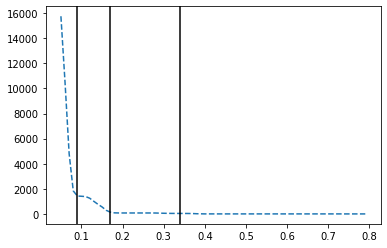

In [115]:
plt.plot(support_len.keys(), support_len.values(), '--')
for key in support_len_not_in_N.keys():
    plt.axvline(key, color='k')

6. Построим датасет только из тех элементов,
которые попадают в наборы размером 1 при уровне поддержки 0.38

In [116]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2]
                if elem in new_items] for id in unique_id]


7. Приведем полученный датасет к формату, который можно обработать

In [117]:
te = TransactionEncoder()
te_ary = te.fit_transform(new_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

aluminum foil  bagels  cereals  cheeses  dinner rolls  \
0           True   False    False    False          True   
1           True   False     True     True         False   
2          False    True     True     True          True   
3          False   False     True    False         False   
4          False   False    False    False          True   

   dishwashing liquid/detergent   eggs  ice cream  lunch meat   milk  poultry  \
0                         False  False       True        True  False    False   
1                          True  False      False       False   True    False   
2                         False   True       True        True   True     True   
3                         False  False      False        True  False    False   
4                         False   True      False       False   True     True   

    soda  vegetables  waffles  yogurt  
0   True        True    False    True  
1  False        True     True    True  
2   True        True    False   False  
3   True       False    False   False  
4   True        True     True    True

8. Проведем ассоциативный анализ при уровне поддержки 0.3 для нового датасета.

In [118]:
results = apriori(df, min_support=0.3, use_colnames=True)
results

support                                    itemsets
0   0.384548                             (aluminum foil)
1   0.385426                                    (bagels)
2   0.395961                                   (cereals)
3   0.390694                                   (cheeses)
4   0.388938                              (dinner rolls)
5   0.388060              (dishwashing liquid/detergent)
6   0.389816                                      (eggs)
7   0.398595                                 (ice cream)
8   0.395083                                (lunch meat)
9   0.380158                                      (milk)
10  0.421422                                   (poultry)
11  0.390694                                      (soda)
12  0.739245                                (vegetables)
13  0.394205                                   (waffles)
14  0.384548                                    (yogurt)
15  0.310799                 (aluminum foil, vegetables)
16  0.300263                        (bagels, vegetables)
17  0.310799                       (cereals, vegetables)
18  0.309043                       (cheeses, vegetables)
19  0.308165                  (dinner rolls, vegetables)
20  0.306409  (dishwashing liquid/detergent, vegetables)
21  0.326602                          (eggs, vegetables)
22  0.302897                     (ice cream, vegetables)
23  0.311677                    (lunch meat, vegetables)
24  0.331870                       (poultry, vegetables)
25  0.305531                          (soda, vegetables)
26  0.315189                       (waffles, vegetables)
27  0.319579                        (yogurt, vegetables)

9. Проведем ассоциативный анализ при уровне поддержки 0.15 для нового датасета.
Выведем все наборы размер которых больше 1 и в котором есть 'yogurt' или 'waffles'

In [119]:
results = apriori(df, min_support=0.15, use_colnames=True)
results[['yogurt' in results["itemsets"][i] or 'waffles' in results["itemsets"][i] for i in range(len(results["itemsets"]))]]

support                                 itemsets
13   0.394205                                (waffles)
14   0.384548                                 (yogurt)
27   0.169447                 (waffles, aluminum foil)
28   0.177349                  (aluminum foil, yogurt)
40   0.159789                        (waffles, bagels)
41   0.162423                         (bagels, yogurt)
52   0.160667                       (waffles, cereals)
53   0.172081                        (cereals, yogurt)
63   0.172959                       (cheeses, waffles)
64   0.172081                        (cheeses, yogurt)
73   0.169447                  (waffles, dinner rolls)
74   0.166813                   (dinner rolls, yogurt)
82   0.175593  (waffles, dishwashing liquid/detergent)
83   0.158033   (dishwashing liquid/detergent, yogurt)
90   0.169447                          (waffles, eggs)
91   0.174715                           (eggs, yogurt)
97   0.172959                     (waffles, ice cream)
98   0.156277                      (ice cream, yogurt)
103  0.184372                    (lunch meat, waffles)
104  0.161545                     (lunch meat, yogurt)
108  0.167691                           (milk, yogurt)
111  0.166813                       (waffles, poultry)
112  0.180860                        (poultry, yogurt)
114  0.177349                          (waffles, soda)
115  0.167691                           (soda, yogurt)
116  0.315189                    (waffles, vegetables)
117  0.319579                     (yogurt, vegetables)
118  0.173837                        (waffles, yogurt)
119  0.152766      (aluminum foil, yogurt, vegetables)
128  0.157155               (eggs, yogurt, vegetables)
130  0.157155        (lunch meat, waffles, vegetables)
131  0.152766            (poultry, yogurt, vegetables)

10. Построим датасет, из тех элементов, которые не попали в
датасет в п. 6 и приведем его к удобному для анализа виду

In [120]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2]
                if not elem in new_items] for id in unique_id]

In [121]:
te = TransactionEncoder()
te_ary = te.fit_transform(new_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

all- purpose   beef  butter  coffee/tea  flour  fruits  hand soap  \
0          True   True    True       False   True   False      False   
1         False  False   False       False  False   False       True   
2         False  False   False       False  False   False       True   
3          True  False   False       False  False   False      False   
4          True  False   False       False   True   False       True   

   individual meals  juice  ketchup  ...  pasta   pork  sandwich bags  \
0             False  False    False  ...  False   True           True   
1              True  False    False  ...  False  False           True   
2             False  False     True  ...  False   True          False   
3             False   True    False  ...  False  False          False   
4              True  False    False  ...   True   True          False   

   sandwich loaves  shampoo   soap  spaghetti sauce  sugar  toilet paper  \
0            False     True   True            False  False         False   
1            False     True  False            False  False          True   
2             True     True   True             True  False          True   
3            False    False  False            False  False          True   
4             True    False  False             True  False          True   

   tortillas  
0      False  
1       True  
2      False  
3      False  
4       True  

[5 rows x 23 columns]

11. Проведем анализ Apriori для полученного датасета

In [122]:
results = apriori(df, min_support=0.1, use_colnames=True)
results

support                         itemsets
0    0.374890                   (all- purpose)
1    0.374890                           (beef)
2    0.367867                         (butter)
3    0.379280                     (coffee/tea)
4    0.352941                          (flour)
..        ...                              ...
271  0.151888  (toilet paper, spaghetti sauce)
272  0.148376     (tortillas, spaghetti sauce)
273  0.151888            (sugar, toilet paper)
274  0.147498               (tortillas, sugar)
275  0.156277        (tortillas, toilet paper)

[276 rows x 2 columns]

12. Напишем правило, для вывода всех наборов,
в которых хотя бы два элемента начинаются на 's'

In [123]:
[ elem for elem in results['itemsets'] if len(elem) >= 2 and list(elem)[0][0]=='s' and list(elem)[1][0]=='s']

[frozenset({'sandwich bags', 'sandwich loaves'}),
 frozenset({'sandwich bags', 'shampoo'}),
 frozenset({'sandwich bags', 'soap'}),
 frozenset({'sandwich bags', 'spaghetti sauce'}),
 frozenset({'sandwich bags', 'sugar'}),
 frozenset({'sandwich loaves', 'shampoo'}),
 frozenset({'sandwich loaves', 'soap'}),
 frozenset({'sandwich loaves', 'spaghetti sauce'}),
 frozenset({'sandwich loaves', 'sugar'}),
 frozenset({'shampoo', 'soap'}),
 frozenset({'shampoo', 'spaghetti sauce'}),
 frozenset({'shampoo', 'sugar'}),
 frozenset({'soap', 'spaghetti sauce'}),
 frozenset({'soap', 'sugar'}),
 frozenset({'spaghetti sauce', 'sugar'})]

13. Напишем правило, для вывода всех наборов, для
которых уровень поддержки изменяется от 0.1 до 0.25

In [124]:
a = results["support"] < 0.25
b = results["support"] > 0.1
results[a & b]

support                         itemsets
23   0.144864             (all- purpose, beef)
24   0.147498           (all- purpose, butter)
25   0.146620       (all- purpose, coffee/tea)
26   0.142230            (all- purpose, flour)
27   0.150132           (all- purpose, fruits)
..        ...                              ...
271  0.151888  (toilet paper, spaghetti sauce)
272  0.148376     (tortillas, spaghetti sauce)
273  0.151888            (sugar, toilet paper)
274  0.147498               (tortillas, sugar)
275  0.156277        (tortillas, toilet paper)

[253 rows x 2 columns]